<table width='100%'>
<tr>
<td style='background-color:white'>
    <p align="left">
    Part I<br>
        <b>Lab Machine Learning for Data Science</b><br>
    Summer Semester 2024
    </p>
</td>
<td style='background-color:white'>
    Evita Vardhani - 5587165<br>
    Hyeonhui Lee - 5585677<br>
    Jing Chen - 5582644<br>
</td>
</tr>
</table>

<br>
<center>
    <h1>Getting Insights into an Unsupervised Dataset</h1>
</center>
<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy

1. Loading the Data, Preprocessing, Initial Data Analysis

In [2]:
import requests
import zipfile
import io


url = 'https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
with zip_file.open('Wholesale customers data.csv') as file:
    df_customes = pd.read_csv(file)

df_customes.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [3]:
df_customes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df_customes.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [5]:
categories = df_customes.columns
array_customes = df_customes.values
print(categories)
print(array_customes)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
[[    2     3 12669 ...   214  2674  1338]
 [    2     3  7057 ...  1762  3293  1776]
 [    2     3  6353 ...  2405  3516  7844]
 ...
 [    2     3 14531 ...   437 14841  1867]
 [    1     3 10290 ...  1038   168  2125]
 [    1     3  2787 ...    65   477    52]]


In [6]:
categories = np.array(categories)[2:]
array_customes =  np.delete(array_customes, [0, 1], axis=1)
print(categories)
print(array_customes)

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']
[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


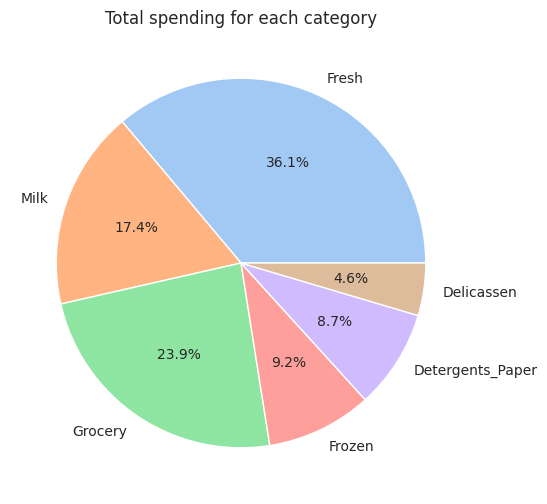

In [7]:
total_spending = np.sum(array_customes,axis=0)
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
plt.pie(total_spending, labels=categories, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.title('Total spending for each category')
plt.show()

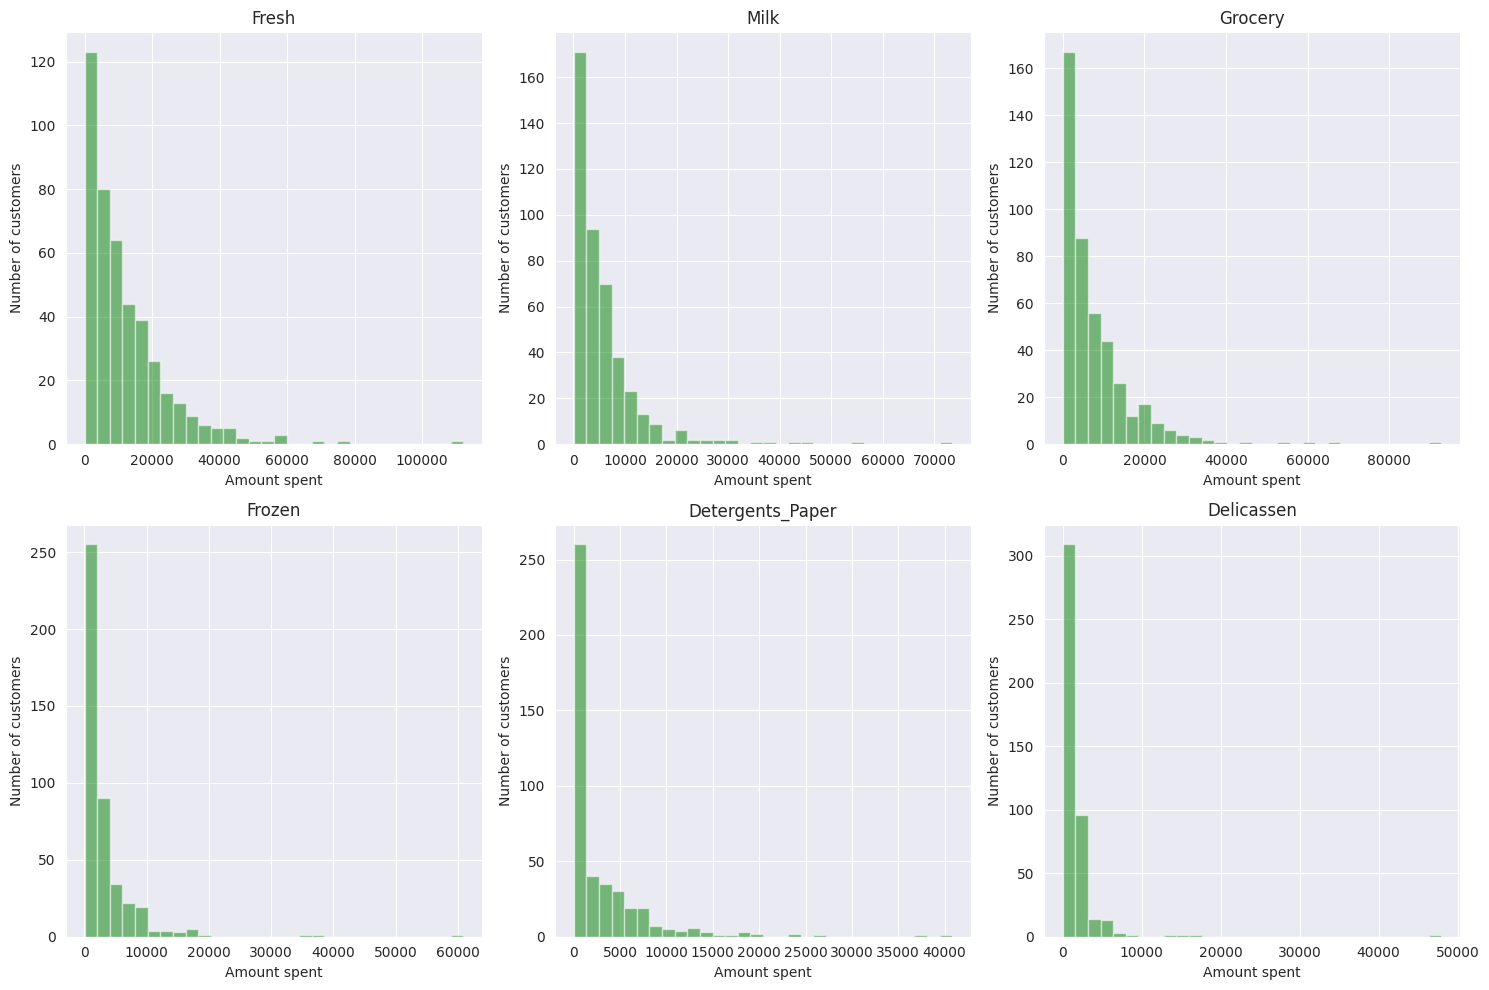

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for k in range(6):
    i = k // 3
    j = k % 3
    axs[i,j].hist(array_customes[:,k], bins=30, color='green', alpha=0.5)
    axs[i,j].set_title(categories[k])
    axs[i,j].set_ylabel('Number of customers')
    axs[i,j].set_xlabel('Amount spent')
plt.tight_layout()
plt.show()

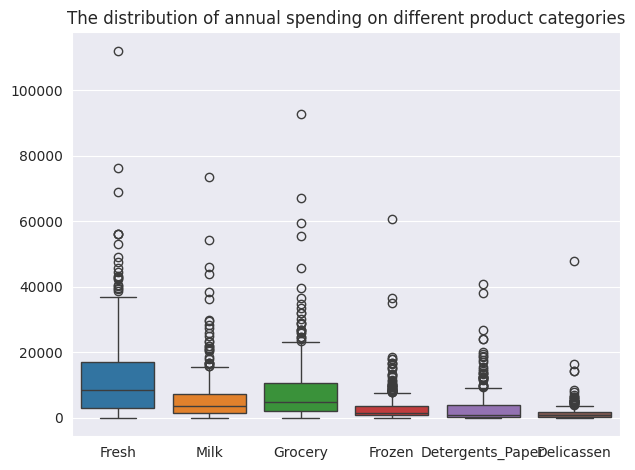

In [9]:
sns.boxplot(data=df_customes[categories])
plt.title('The distribution of annual spending on different product categories')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

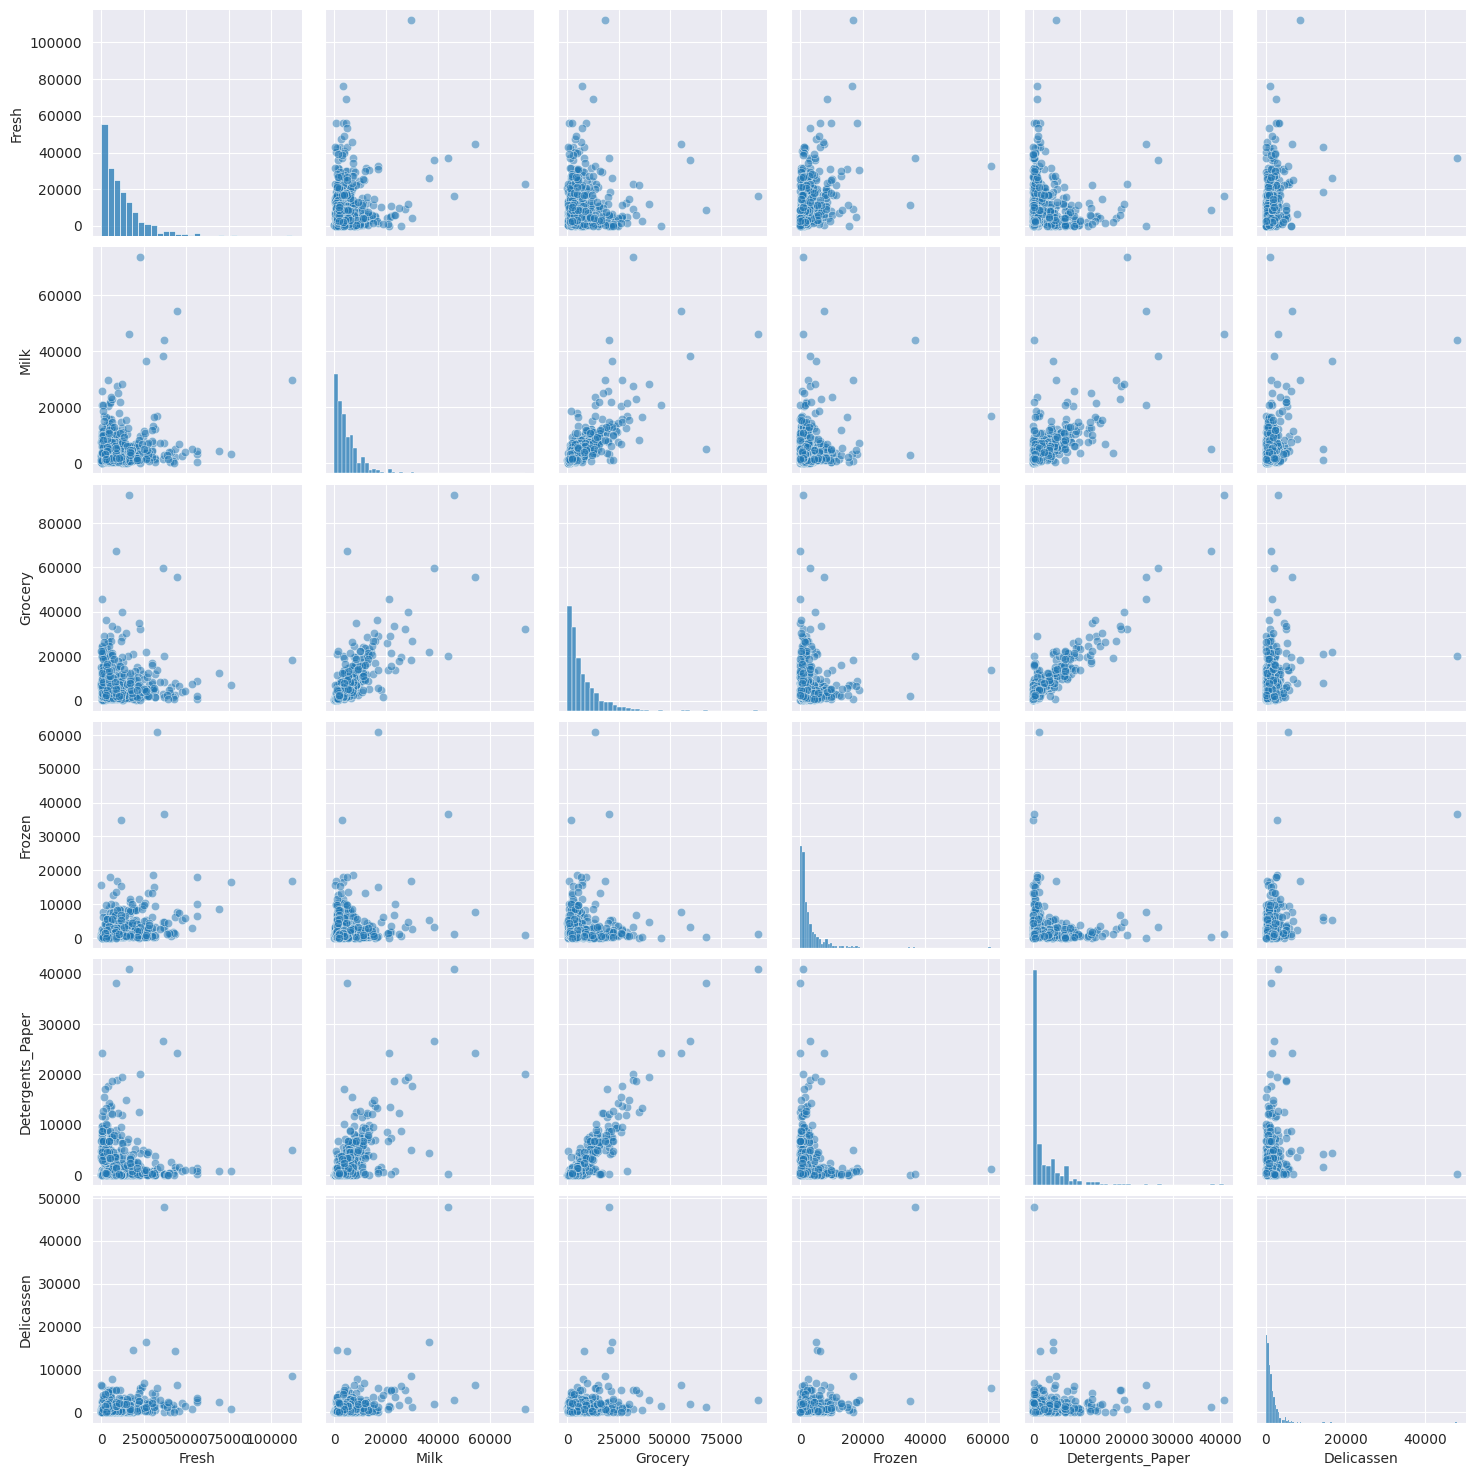

In [10]:
sns.pairplot(pd.DataFrame(array_customes, columns=categories), palette="husl", plot_kws={'alpha':0.5})
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

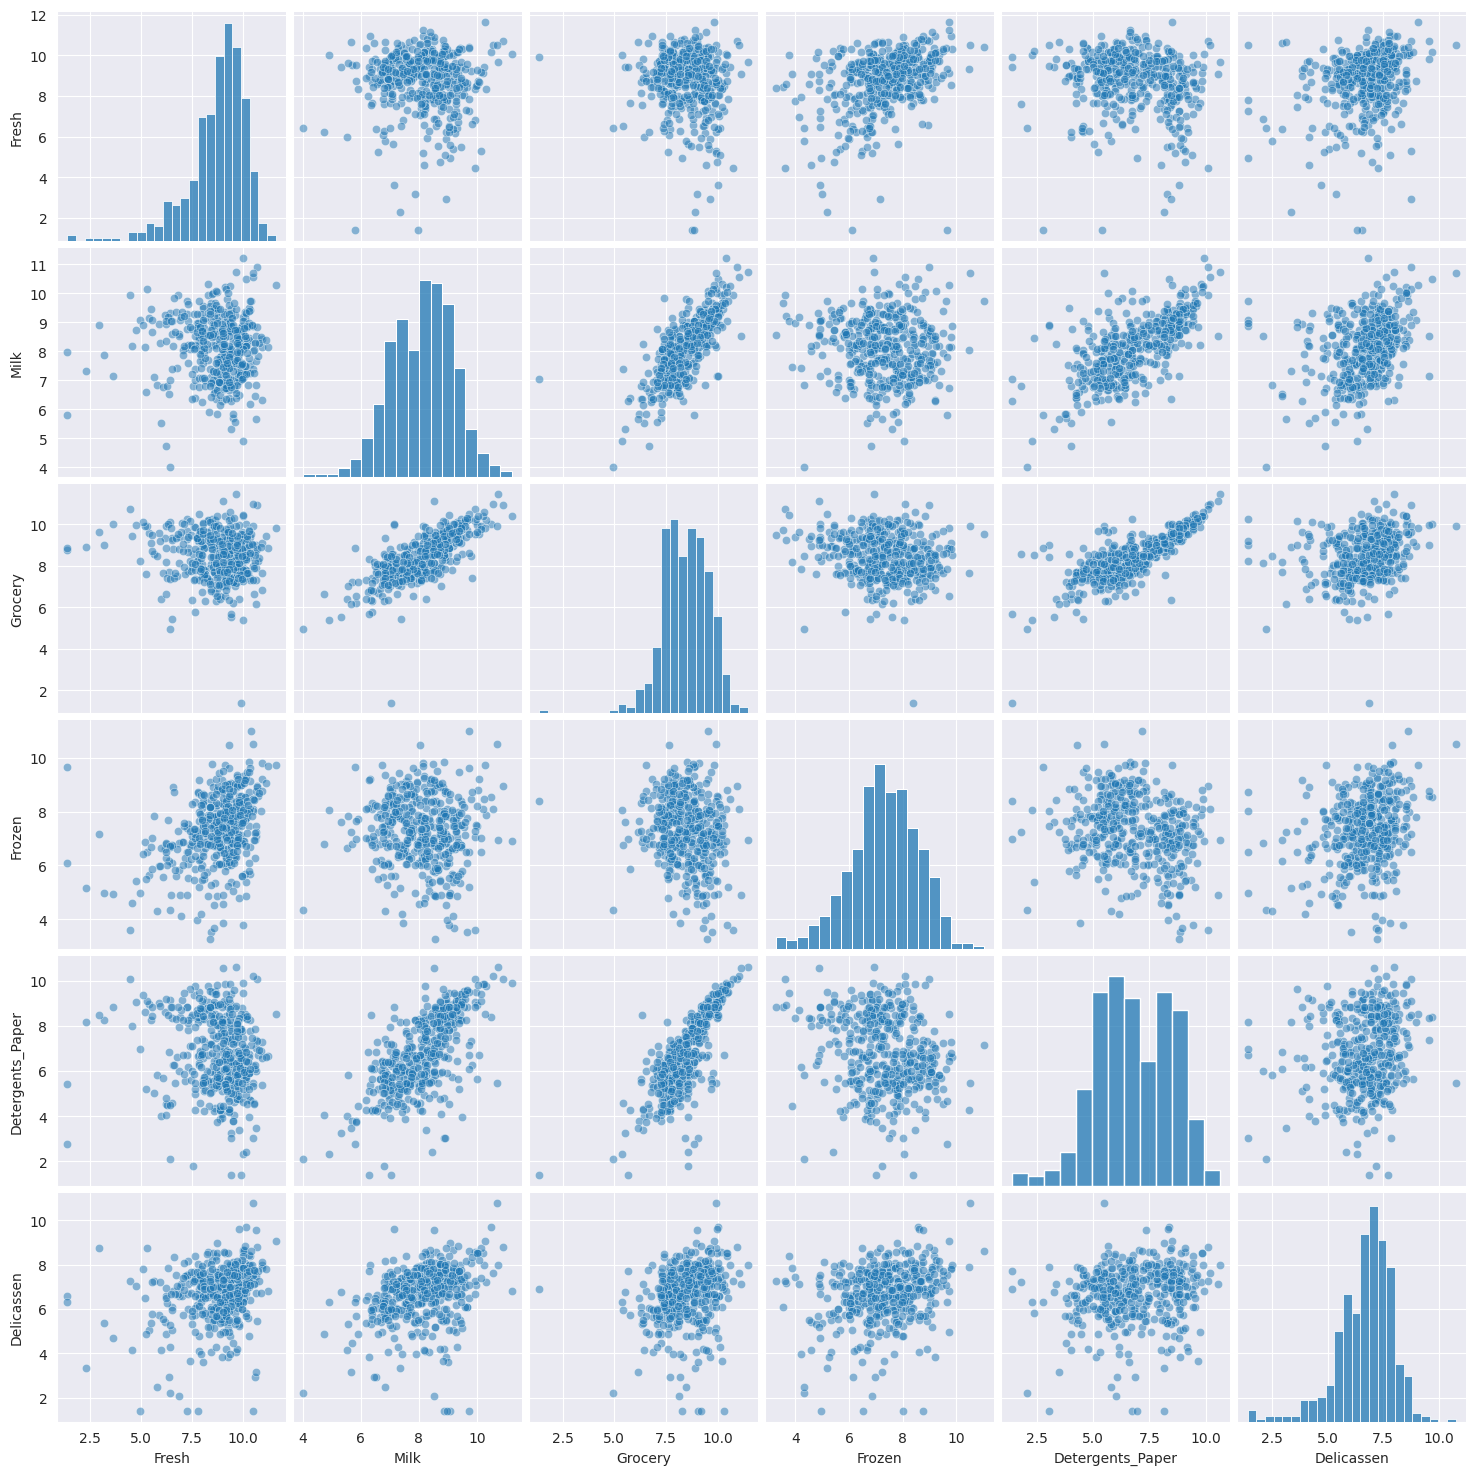

In [11]:
theta_1 = 1
customes_log10 = np.log(array_customes + theta_1)
sns.pairplot(pd.DataFrame(customes_log10, columns=categories), palette="husl", plot_kws={'alpha':0.5})
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

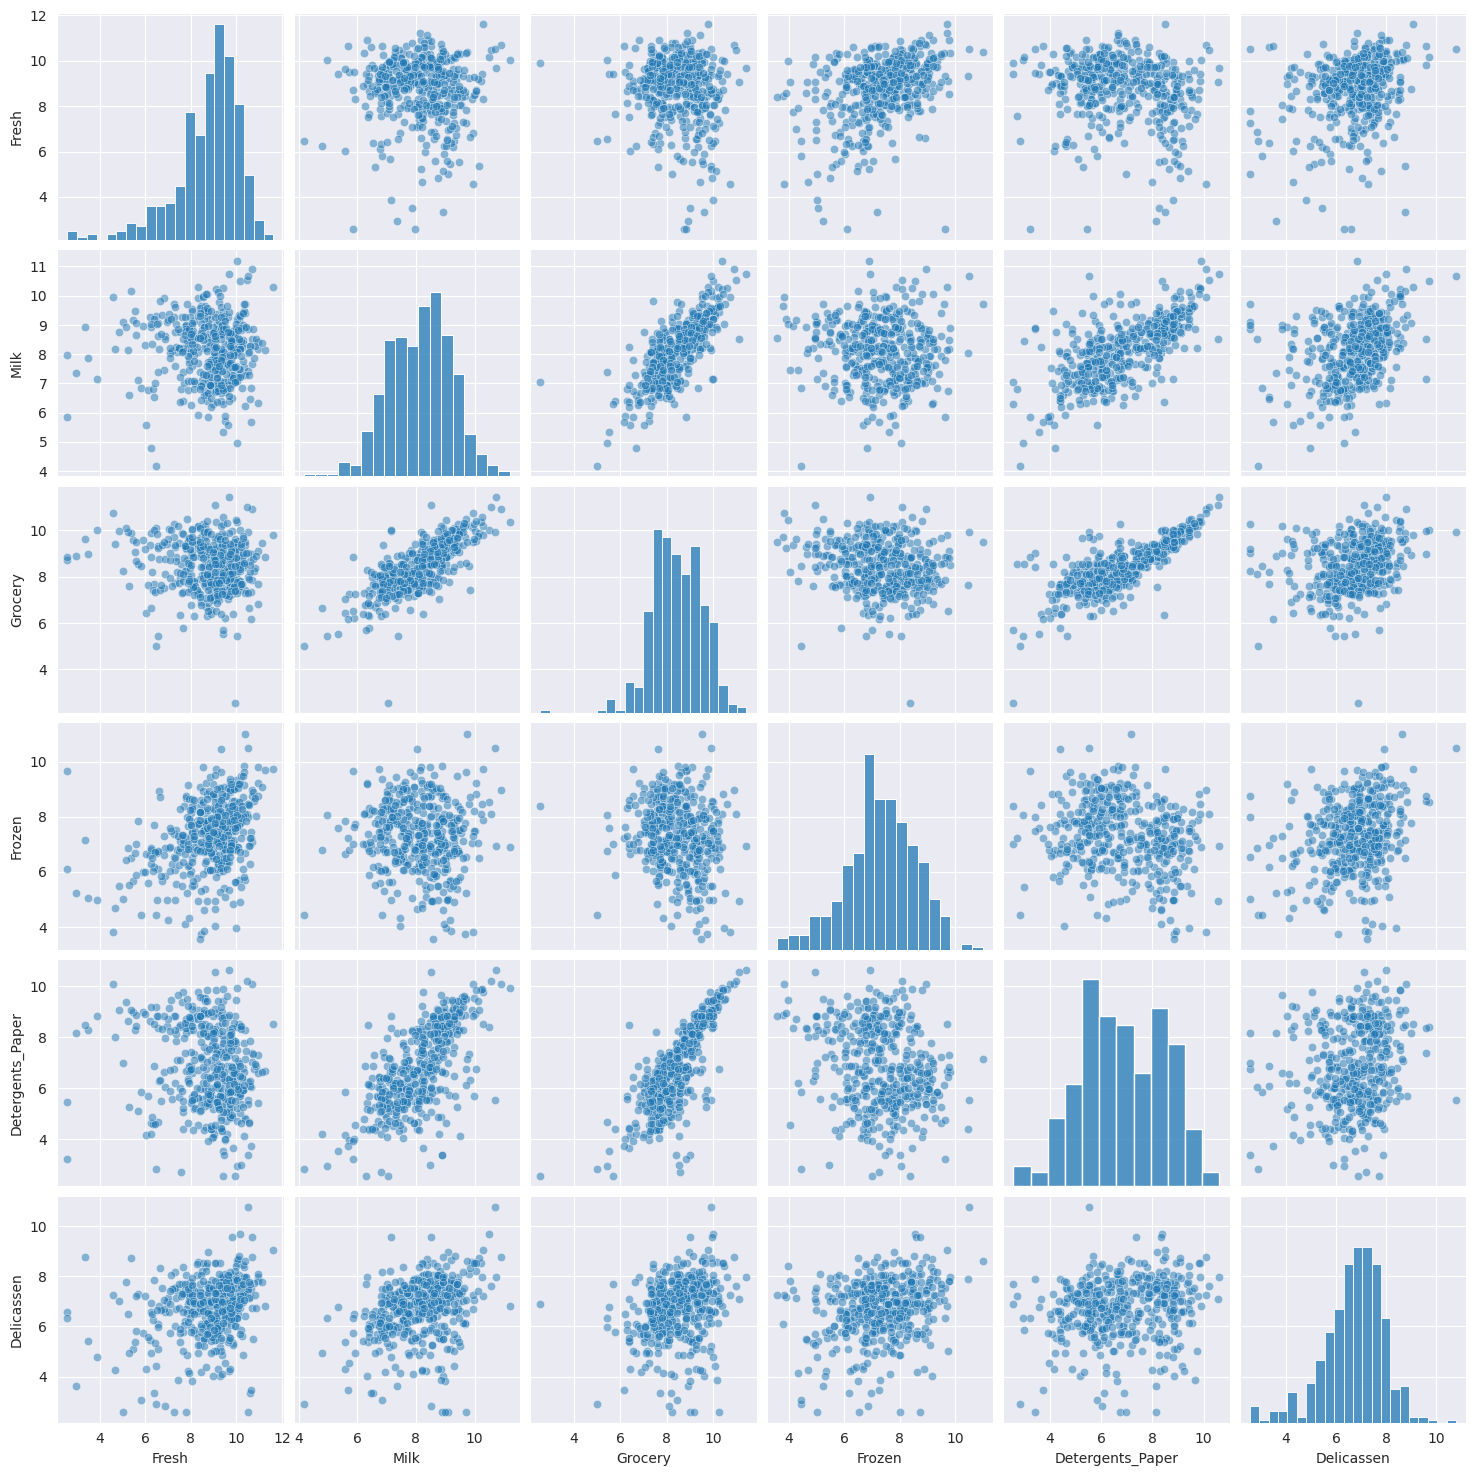

In [12]:
theta_2 = 10
customes_log10 = np.log(array_customes + theta_2)
sns.pairplot(pd.DataFrame(customes_log10, columns=categories), palette="husl", plot_kws={'alpha':0.5})
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

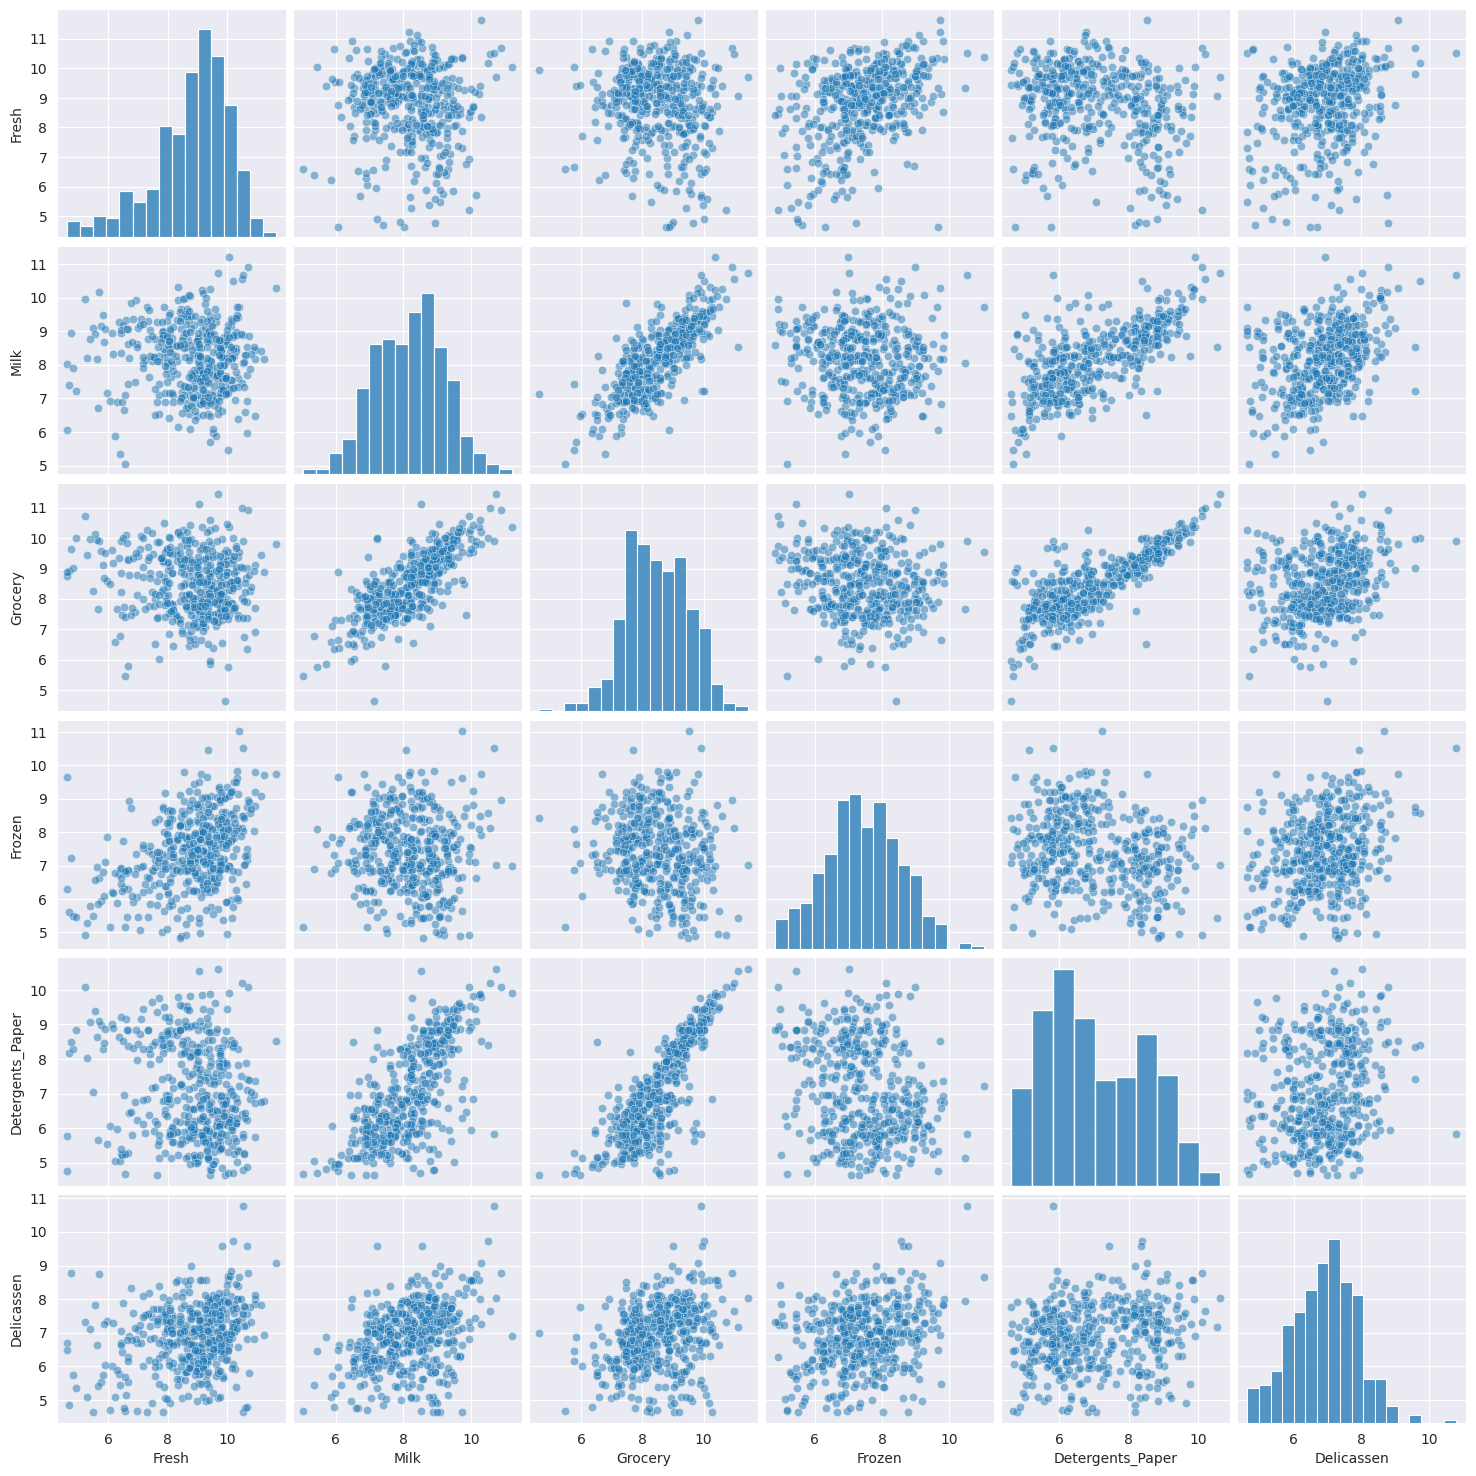

In [13]:
theta_3 = 100
customes_log100 = np.log(array_customes + theta_3)
sns.pairplot(pd.DataFrame(customes_log100, columns=categories), palette="husl", plot_kws={'alpha':0.5})
plt.show()

2. Detecting Anomalies

In [14]:
# Caculate the anomaly scores using hard minimum
distances = scipy.spatial.distance.cdist(customes_log10,customes_log10)
np.fill_diagonal(distances, np.nan)
y_hard_min = np.nanmin(distances,axis=1)
top_10_anomalous_instances = np.argsort(y_hard_min)[-10:] +1
top_10_anomalous_instances_str = [str(idx) for idx in top_10_anomalous_instances]
anomalous_instances_str = ", ".join(top_10_anomalous_instances_str)
print("The customes were detected as anomalies: "+ anomalous_instances_str)

The customes were detected as anomalies: 66, 229, 129, 188, 143, 184, 96, 155, 76, 339


In [15]:
# Define the Softmin function
def softmin(distances,gamma):
    N = len(distances)
    softmin_value = np.zeros(N)
    for j in range(N):
        softmin_value[j] = (-1 / gamma) * np.log(np.sum(np.exp(-gamma * distances[j,np.arange(N) != j])) / (N-1))
    return softmin_value

In [16]:
# Bootstrap sampling and anomaly scores calculation
def compute_anomaly_avg_and_spread(data, gamma, num_bootstrap):
    N = data.shape[0]
    anomaly_scores = np.zeros((N, num_bootstrap))

    for i in range(num_bootstrap):
        # Bootstrap sampling
        sample_indices = np.random.choice(N, N, replace=True)
        bootstrap_sample = data[sample_indices]

        # caculate distance matrix
        distances = scipy.spatial.distance.cdist(bootstrap_sample, bootstrap_sample)

        # Calculate the anomaly scores and map them back to the original samples
        for j in range(N):
            distance = np.array(distances[j,np.arange(N) != j])
            anomaly_scores[sample_indices[j], i] = (-1 / gamma) * np.log(np.sum(np.exp(-gamma * distance))) / (N)

    # Compute the mean and standard deviation along the rows
    anomaly_scores = np.ma.masked_equal(anomaly_scores, 0)
    anomaly_avg = np.mean(anomaly_scores, axis=1).filled(0)
    anomaly_spread = np.std(anomaly_scores, axis=1).filled(0)
    return anomaly_avg, anomaly_spread

In [17]:
def evaluate_gamma(data, gammas, num_bootstrap):
    results = {}
    for gamma in gammas:
        anomaly_avg, anomaly_spread = compute_anomaly_avg_and_spread(data,gamma, num_bootstrap)
        results[gamma] = (anomaly_avg, anomaly_spread)
    return results

def plot_results(results):
    for gamma, (avg, spread) in results.items():
        # Find the indices of the top 10 instances with the highest average anomaly values
        top_10_indices = np.argsort(avg)[-10:]

        # Get the corresponding average anomaly values and standard deviations
        top_10_avg = avg[top_10_indices]
        top_10_spread = spread[top_10_indices]

        plt.figure(figsize=(10, 6))
        plt.errorbar(range(len(avg)), avg, yerr=spread, fmt='o', ecolor= 'g', color='r',elinewidth=1, ms=1, label=f'Gamma={gamma}')
        plt.errorbar(top_10_indices, top_10_avg, yerr=top_10_spread, fmt='o', ecolor='b', color='m', elinewidth=1, ms=5, label='Top 10 Anomalies')
        plt.xlabel('Instance Index')
        plt.ylabel('Anomaly Score')
        plt.legend()
        plt.title(f'Anomaly Score vs Instance Index for Gamma={gamma}')
        plt.show()

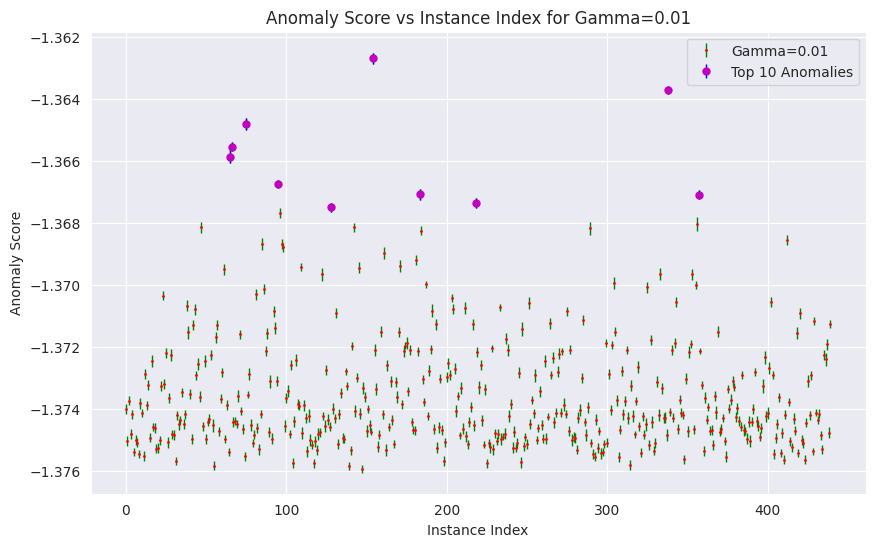

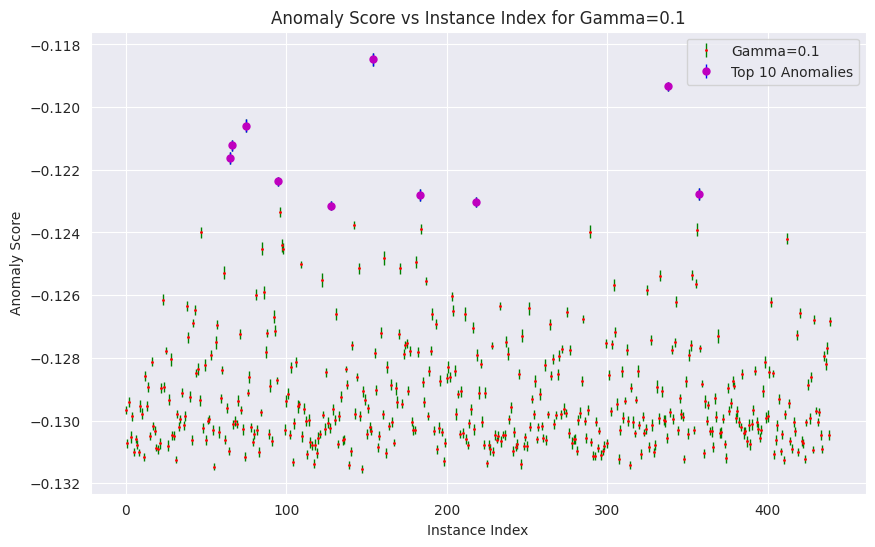

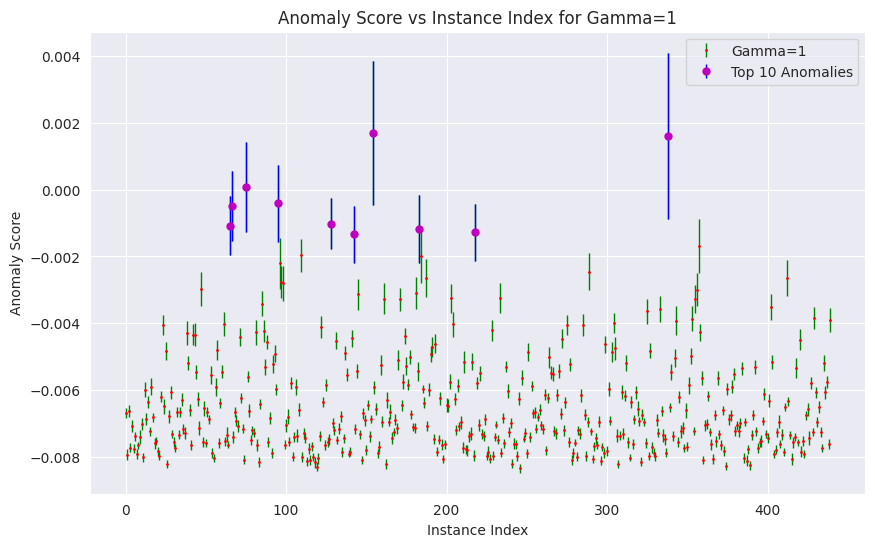

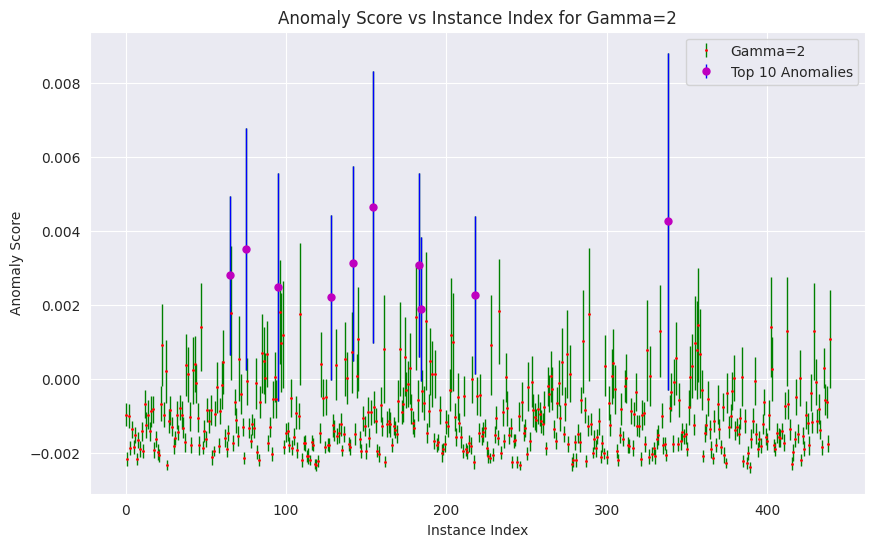

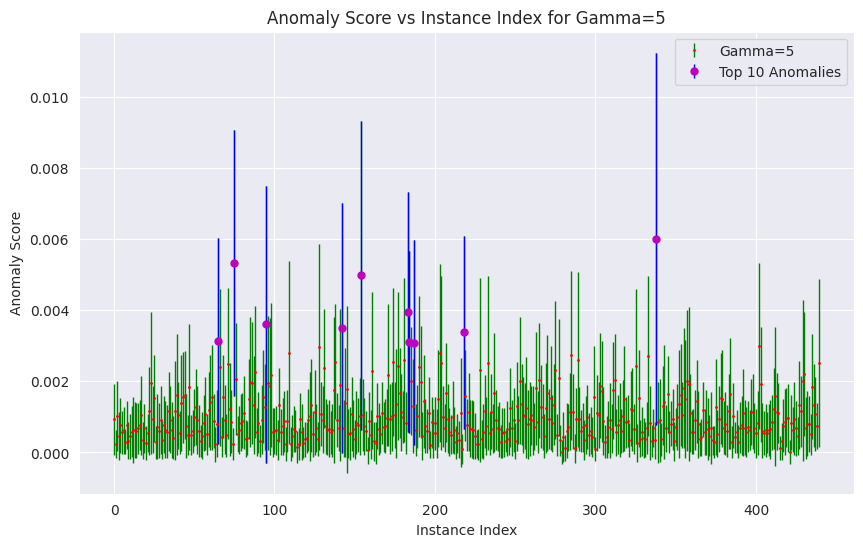

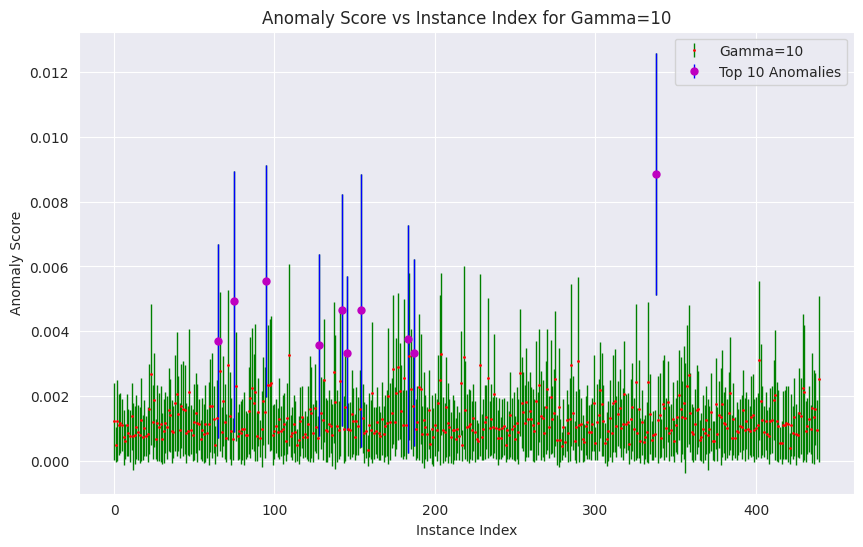

In [18]:
gammas = [0.01, 0.1, 1, 2, 5, 10,]
results = evaluate_gamma(customes_log10,gammas,100)
plot_results(results)

3 Getting Insights into Anomalies

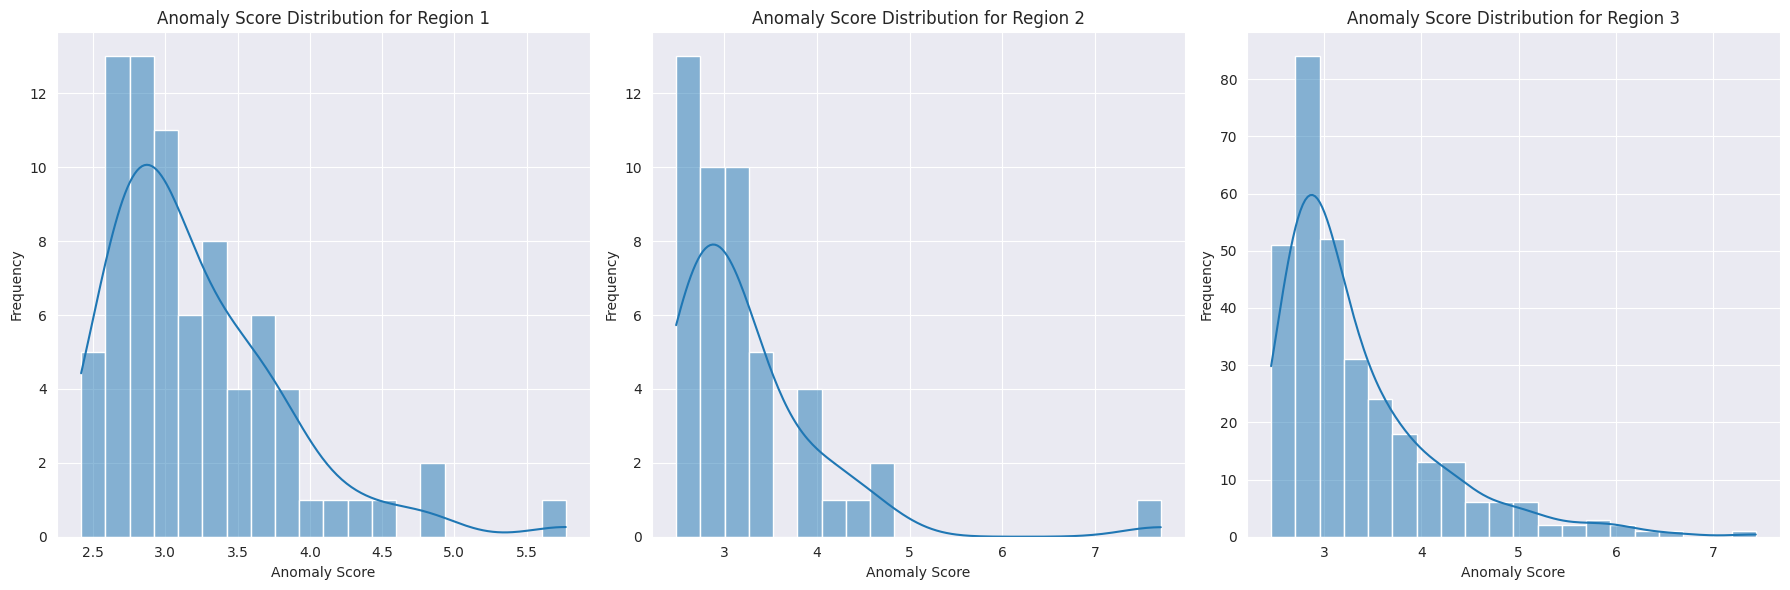

In [19]:
distances = scipy.spatial.distance.cdist(customes_log10, customes_log10)
anomaly_scores = softmin(distances,1)

# Group by region
grouped_data = df_customes.groupby('Region')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Calculate the anomaly scores by group
for i, (group_name, group_data) in enumerate(grouped_data):
    group_anomaly_scores = anomaly_scores[group_data.index]
    group_anomaly_mean = group_anomaly_scores.mean()
    group_anomaly_std = group_anomaly_scores.std()


    # Plot anomaly score distribution for the current group in the i-th subplot
    sns.histplot(group_anomaly_scores, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Anomaly Score Distribution for Region {group_name}")
    axes[i].set_xlabel("Anomaly Score")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [20]:
def compute_contribution_to_anomaly_score(data, gamma):
    num_instances = len(data)
    dists = scipy.spatial.distance.cdist(data, data)
    anomaly_scores = softmin(dists,gamma)
    contributions = np.zeros((num_instances,num_instances))
    for j in range(num_instances):
        # Exclude the self-distance
        distance_j = np.delete(dists[j], j)
        total_exp_distances = np.sum(np.exp(-gamma * distance_j))
        for i in range(num_instances):
            if i != j:
                exp_distances =np.exp(-gamma *dists[j][i])
                contributions[j][i] = exp_distances / total_exp_distances * anomaly_scores[j]

    return contributions

def propagate_contributions_to_input_features(data, contributions):
    num_instances, num_features = data.shape
    feature_contributions = np.zeros((num_instances, num_features))

    for j in range(num_instances):
        for i in range(num_features):
            feature_sum = 0
            for k in range(num_instances):
                features_distance = data[k]-data[j]
                if k != j and np.linalg.norm(features_distance) !=0:
                    feature_sum += (np.abs(features_distance)[i])**2 / np.linalg.norm(features_distance)**2 * contributions[j][k]
            feature_contributions[j, i] = feature_sum
    return feature_contributions

contributions = compute_contribution_to_anomaly_score(customes_log10,1)
feature_contributions = propagate_contributions_to_input_features(customes_log10, contributions)


t_SNE

In [43]:
np.argsort(anomaly_scores)[-10:]

array([ 47,  98,  97, 412, 187, 289, 109,  96, 357, 184, 218, 142, 128,
        65, 183,  66,  95,  75, 154, 338])

In [1]:
df_customes.iloc[np.argsort(anomaly_scores)[-10:], :]

NameError: name 'df_customes' is not defined

In [24]:
pip install dash_bootstrap_components


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.5 MB/s eta 0:00:00


In [25]:
pip install dash

In [31]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE

# Load your data
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(customes_log10)
df = pd.DataFrame(data_2d, columns=['t_SNE 1', 't_SNE 2'])
df['index'] = df.index
top_10_indices = np.argsort(anomaly_scores)[-10:]
df['colors'] = ['anomalies' if i in top_10_indices else 'non_anomalies' for i in df.index]
color_discrete_map = {'anomalies': 'blue', 'non_anomalies': 'orange'}
# Create the scatter plot with t-SNE results
fig = px.scatter(df, x='t_SNE 1', y='t_SNE 2', hover_data=['index'], color='colors',color_discrete_map=color_discrete_map, labels={'t_SNE 1': 't-SNE 1', 't_SNE 2': 't-SNE 2'})
fig.update_traces(marker=dict(size=8))

# Define the modal for displaying histograms
modal = html.Div(
    [
        dbc.Modal(
            [
                dbc.ModalHeader("Feature Contributions"),
                dbc.ModalBody(
                    dcc.Graph(id='histogram')
                ),
                dbc.ModalFooter(
                    dbc.Button("Close", id="close-modal", className="ml-auto")
                ),
            ],
            id="modal",
            size="lg",
            centered=True,
        ),
    ]
)

# Define the app layout
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dbc.Container([
    html.H1("T-SNE Scatter Plot"),
    dcc.Graph(id='scatter-plot', figure=fig),
    modal
])

# Define callback to show modal and update histogram on click
@app.callback(
    [Output("modal", "is_open"), Output('histogram', 'figure')],
    [Input("scatter-plot", "clickData"), Input("close-modal", "n_clicks")],
    [dash.dependencies.State("modal", "is_open")],
)
def toggle_modal(click_data, n_clicks, is_open):
    ctx = dash.callback_context
    if ctx.triggered:
        prop_id = ctx.triggered[0]["prop_id"]
        if prop_id == "scatter-plot.clickData":
            if click_data:
                point_index = click_data["points"][0]["customdata"][0]
                customes_spending = array_customes[point_index]
                # Retrieve feature contributions
                feature_contribution = feature_contributions[point_index]
                #create ylabel
                y_labels = [f"{categories[i]} (x{i}= {customes_spending[i]})" for i in range(len(categories))]
                # Create histogram
                histogram_fig = go.Figure(go.Bar(x=feature_contribution,y=y_labels,orientation='h',marker_color='red'))
                histogram_fig.update_layout(title=f"Feature Contributions for Index {point_index}")
                return not is_open, histogram_fig
    return is_open, dash.no_update

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>